# Projet Python Data Analaysis

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from tkinter import filedialog as fd
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import random as rd

In [2]:
file_data= fd.askopenfilename(title='Data')
file_names=fd.askopenfilename(title='Names')

In [158]:
data = pd.read_csv(file_data, header=None, sep=r"\s+")

In [159]:
names = []
with open(file_names, 'r') as f:
    names = f.readlines()[0].split(',')
    names.append('class')
data.columns=names

In [5]:
file_value_means=fd.askopenfilename(title='Value Means')
means = []
with open(file_value_means, 'r') as f:
    means = f.readlines()
    for i in means:
        print(i.replace('\n',''))

height: integer. | Height of the block.
lenght: integer. | Length of the block.
area: integer. | Area of the block (height * lenght);
eccen: continuous. | Eccentricity of the block (lenght / height);
p_black: continuous. | Percentage of black pixels within the block (blackpix / area);
p_and: continuous. | Percentage of black pixels after the application of the Run Length Smoothing Algorithm (RLSA) (blackand / area);
mean_tr: continuous. | Mean number of white-black transitions (blackpix / wb_trans);
blackpix: integer. | Total number of black pixels in the original bitmap of the block.
blackand: integer. | Total number of black pixels in the bitmap of the block after the RLSA.
wb_trans: integer. | Number of white-black transitions in the original bitmap of the block


In [ ]:
pd.set_option('display.max_rows', len(data))
display(data)

### Data Processing

In [160]:
data=data.dropna(how='all')

In [161]:
labels = {1:"text", 2:"horiz. line", 3:"graphic", 4:"vert. line", 5:"picture"}
classes = ("text", "horiz. line","graphic","vert. line","picture")

In [162]:
for label in labels.keys():
    print(label ,': ', len(data[data['class']==label]))

1 :  4913
2 :  329
3 :  28
4 :  88
5 :  115


We can see that the class 1 is too much represented in this dataset, it's better to avoid overfitting by lowering it a bit

In [163]:
data_text = data[data['class']==1]

indexes=rd.sample(range(len(data_text)), 300)

bad_df = data_text.index.isin(indexes)
unused_data_text = data_text[~bad_df]

new_data = data_text.iloc[indexes]
new_data = new_data.append(data[data['class']!=1], ignore_index=True)
new_data = new_data.sample(frac=1).reset_index(drop=True)

In [164]:
for label in labels.keys():
    print(label ,': ', len(new_data[new_data['class']==label]))

1 :  300
2 :  329
3 :  28
4 :  88
5 :  115


In [116]:
for i in range(len(new_data)):
    try:
        row = new_data.loc[i]
        new_data.loc[i,'class']=labels[int(row["class"])]
    except:
        pass
#new_data =  new_data[new_data['height']<150]
#new_data =  new_data[new_data['area']<3500]
#new_data =  new_data[new_data['eccen']<350]

In [ ]:
new_data






### Data Visualisation

Text(0, 0.5, '')

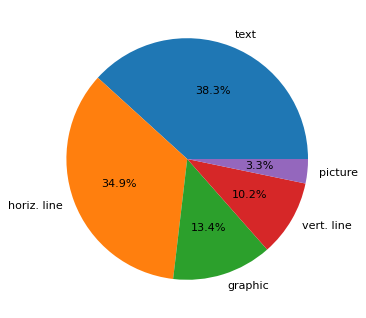

In [32]:
plt.figure(figsize=(5, 5), dpi=80)
new_data['class'].value_counts().plot.pie(autopct='%1.1f%%',labels=classes)
plt.ylabel('')

Text(0, 0.5, 'lenght')

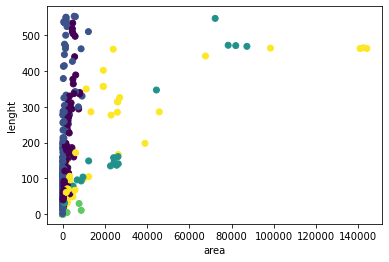

In [178]:

plt.figure()
plt.scatter(new_data['area'], new_data['lenght'], c=new_data['class'])
plt.xlabel('area')
plt.ylabel('lenght')

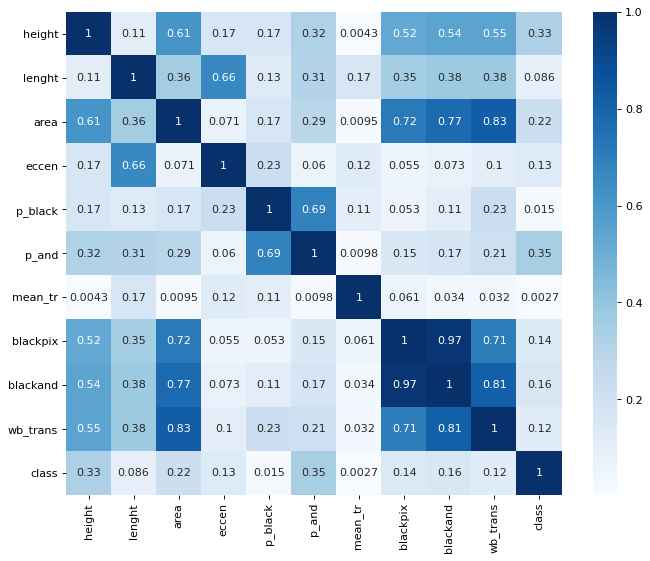

In [33]:
corrMatrix = new_data.corr().abs()
plt.figure(figsize=(10, 8), dpi=80)
sn.heatmap(corrMatrix, annot=True, cmap="Blues")
plt.show()

We can see that the most important variables for the class predictions are height, p_black and mean_tr

### Model (Sklearn)

In [165]:
rd.seed(10)
X = new_data.iloc[:, :-1]
Y= new_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [180]:
X_cor = new_data[['height','area','p_and']]
Y_cor= new_data['class']
X_cor_train, X_cor_test, y_cor_train, y_cor_test = train_test_split(X_cor, Y_cor, test_size=0.33, random_state=42)

In [143]:
X_all = data.iloc[:, :-1]
Y_all= data['class']
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, Y_all, test_size=0.33, random_state=42)

(array([109.,   0., 103.,   0.,   0.,   7.,   0.,  26.,   0.,  39.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

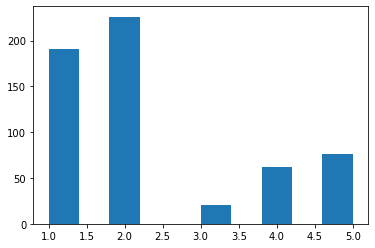

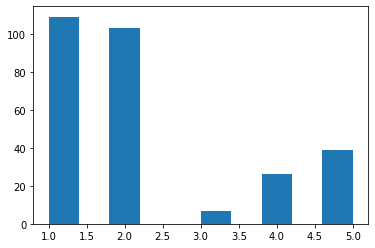

In [166]:
plt.hist(y_train)
plt.figure()
plt.hist(y_test)

### KNN

Find best K

Text(0.5, 1.0, 'Accuracies by k values')

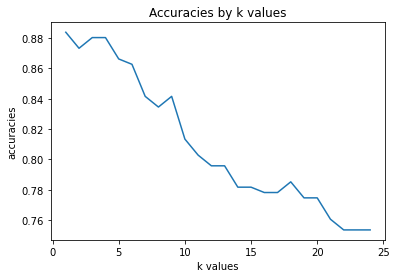

In [42]:
accuracies=[]
for i in range(1,25):
    model = KNN(n_neighbors=i)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predicted)
    accuracies.append(accuracy)

plt.plot(range(1,25), accuracies)
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.title(label="Accuracies by k values")

It seems that k=4 is the best for knn predictions 

In [181]:
model = KNN(n_neighbors = 4)
model.fit(X_cor_train, y_cor_train)
predicted = model.predict(X_cor_test)

print("Accuracy: ", round(metrics.accuracy_score(y_test, predicted),4)*100, "%")

Accuracy:  70.77 %


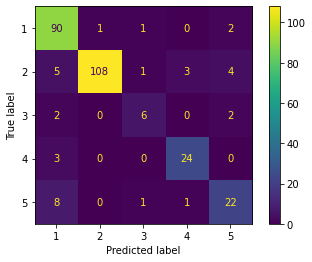

In [54]:
plot_confusion_matrix(model,X_test,y_test)

In [182]:
cm = confusion_matrix(y_test, predicted)

founds=[]
not_founds=[]
for i in range(5):
    acc = cm[i,i]/cm[:,i].sum()
    found = cm[i,i]
    for f in range(found):
        founds.append(i+1)
    not_found = cm[:,i].sum()-found
    for nf in range(not_found):
        not_founds.append(i+1)
    print("\033[1m" + labels[i+1] + "\033[21m", ":", round(acc,3)*100,"%")

text : 66.7 %
horiz. line : 77.5 %
graphic : 25.0 %
vert. line : 100.0 %
picture : 50.0 %


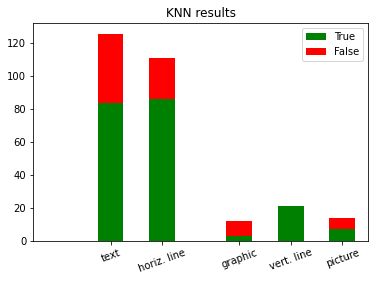

In [183]:
plt.hist([founds, not_founds], color = ['green', 'red'], label = ['True', 'False'],histtype = 'barstacked')
plt.title('KNN results')
plt.xticks(np.arange(1, 5, step=1))  # Set label locations.
plt.xticks(np.arange(5), ["text", "horiz. line","graphic","vert. line","picture"])  # Set text labels.
plt.xticks([1.2,2,3.2,4,4.8], ["text", "horiz. line","graphic","vert. line","picture"],
       rotation=20)  # Set text labels and properties.
plt.legend()

### Random Forest

Text(0.5, 1.0, 'Accuracies RF by depth')

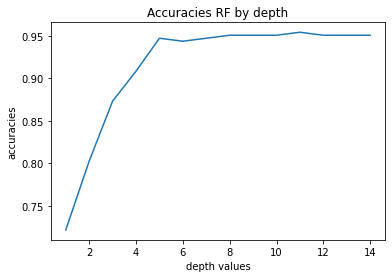

In [194]:
from sklearn.ensemble import RandomForestClassifier

accuracies_RF=[]
for i in range(1,15):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    rf_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, rf_pred)
    accuracies_RF.append(accuracy)

plt.plot(range(1,15), accuracies_RF)
plt.xlabel('depth values')
plt.ylabel('accuracies')
plt.title(label="Accuracies RF by depth")

In [195]:
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train, y_train)
rf_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, rf_pred)
print("Accuracy: ", round(accuracy,4)*100,"%")

Accuracy:  95.07 %


In [ ]:
importance = clf.feature_importances_
plt.scatter(range(10), importance)
plt.ylabel("importance")
plt.xticks(range(10), list(new_data.columns)[:-1],rotation=20)  # Set text labels and properties.


In [188]:
cm = confusion_matrix(y_test, rf_pred)

founds=[]
not_founds=[]
for i in range(5):
    acc = cm[i,i]/cm[:,i].sum()
    found = cm[i,i]
    for f in range(found):
        founds.append(i+1)
    not_found = cm[:,i].sum()-found
    for nf in range(not_found):
        not_founds.append(i+1)
    print("\033[1m" + labels[i+1] + "\033[21m", ":", round(acc,3)*100,"%")

text : 94.19999999999999 %
horiz. line : 93.30000000000001 %
graphic : 77.8 %
vert. line : 100.0 %
picture : 75.0 %


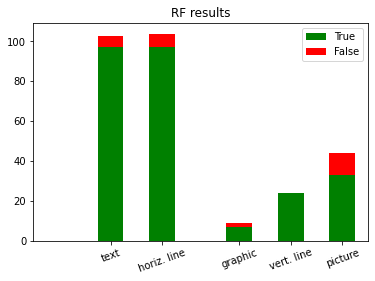

In [189]:
plt.hist([founds, not_founds], color = ['green', 'red'], label = ['True', 'False'],histtype = 'barstacked')
plt.title('RF results')
plt.xticks(np.arange(1, 5, step=1))  # Set label locations.
plt.xticks(np.arange(5), ["text", "horiz. line","graphic","vert. line","picture"])  # Set text labels.
plt.xticks([1.2,2,3.2,4,4.8], ["text", "horiz. line","graphic","vert. line","picture"],
       rotation=20)  # Set text labels and properties.
plt.legend()

### Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_cor_train)
X_test_scaled = scaler.fit_transform(X_cor_test)
glm = LogisticRegression(random_state=0).fit(X_train, y_train)
GLM_pred = glm.predict(X_test)
accuracy = metrics.accuracy_score(y_cor_test, GLM_pred)
print("Accuracy: ", round(accuracy,4)*100,"%")

Accuracy:  88.38000000000001 %


C:\Users\Aymeric Leboucher\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


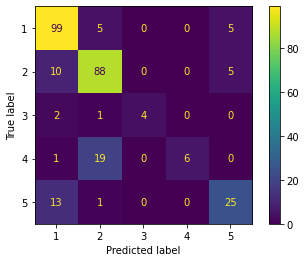

In [173]:
plot_confusion_matrix(glm,X_test_scaled,y_test)

In [175]:
cm = confusion_matrix(y_test, GLM_pred)
founds=[]
not_founds=[]
accuracies_glm=[]
for i in range(5):
    acc = cm[i,i]/cm[:,i].sum()
    accuracies_glm.append(acc)
    found = cm[i,i]
    for f in range(found):
        founds.append(i+1)
    not_found = cm[:,i].sum()-found
    for nf in range(not_found):
        not_founds.append(i+1)
    print("\033[1m" + labels[i+1] + "\033[21m", ":", round(acc,3)*100,"%")
    

text : 79.2 %
horiz. line : 77.2 %
graphic : 100.0 %
vert. line : 100.0 %
picture : 71.39999999999999 %


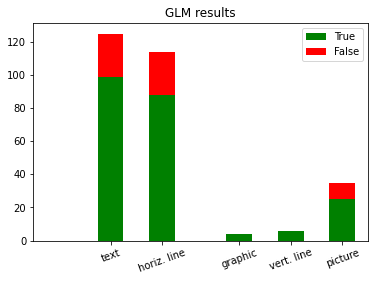

In [176]:
plt.hist([founds, not_founds], color = ['green', 'red'], label = ['True', 'False'],histtype = 'barstacked')
plt.title('GLM results')
plt.xticks(np.arange(1, 5, step=1))  # Set label locations.
plt.xticks(np.arange(5), ["text", "horiz. line","graphic","vert. line","picture"])  # Set text labels.
plt.xticks([1.2,2,3.2,4,4.8], ["text", "horiz. line","graphic","vert. line","picture"],
       rotation=20)  # Set text labels and properties.
plt.legend()

In [154]:
X_test = unused_data_text
y_test = X_test['class']
X_test = X_test.iloc[:,:-1]
predicted = model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, predicted))

Accuracy:  0.9247844827586207


In [ ]:
knn = KNN(n_neighbors = 3)
knn.fit(X_train, y_train)
model = SelectFromModel(knn, prefit=True)
X_new = model.transform(X_train)
print(X_new.shape)
predicted = model.predict(X_new)

print("Accuracy: ", metrics.accuracy_score(y_test, predicted))

In [177]:
len(data)

5473